In [1]:
# Bernstein Vazirani para CPC 2018
# empezamos con algo de identificacion
from qiskit import (register,unregister,execute,
get_backend, available_backends)


In [2]:
available_backends()

['local_qasm_simulator',
 'local_statevector_simulator',
 'local_unitary_simulator']

In [3]:
import Qconfig
reg=register(Qconfig.APItoken,Qconfig.config['url'])
available_backends()

['ibmq_16_rueschlikon',
 'ibmq_5_tenerife',
 'ibmq_5_yorktown',
 'ibmq_qasm_simulator',
 'local_qasm_simulator',
 'local_statevector_simulator',
 'local_unitary_simulator']

In [4]:
available_backends()

['ibmq_16_rueschlikon',
 'ibmq_5_tenerife',
 'ibmq_5_yorktown',
 'ibmq_qasm_simulator',
 'local_qasm_simulator',
 'local_statevector_simulator',
 'local_unitary_simulator']

In [5]:
from qiskit import (QuantumRegister, ClassicalRegister,
                   QuantumCircuit, QISKitError)

In [6]:
q=QuantumRegister(5)
c=ClassicalRegister(5)
F=QuantumCircuit(q,c)
secreto="1011"
for i in range(0,4):
    print("i= %2d"%i, secreto[3-i])
    if secreto[3-i]=="1":
        F.cx(q[i],q[4])
print(F.qasm())

i=  0 1
i=  1 1
i=  2 0
i=  3 1
OPENQASM 2.0;
include "qelib1.inc";
qreg q0[5];
creg c0[5];
cx q0[0],q0[4];
cx q0[1],q0[4];
cx q0[3],q0[4];



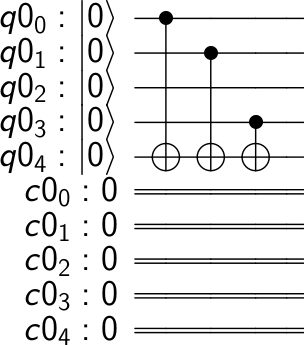

In [7]:
from qiskit.tools.visualization import circuit_drawer
circuit_drawer(F)

In [8]:
BV=QuantumCircuit(q,c)
for i in range(0,4):
    BV.h(q[i])
BV.x(q[4])
BV.h(q[4])
BV+=F
for i in range(0,4):
    BV.h(q[i])
BV.h(q[4])
BV.x(q[4])
for i in range(0,4):
    BV.measure(q[i],c[i])

In [9]:
print(BV.qasm())

OPENQASM 2.0;
include "qelib1.inc";
qreg q0[5];
creg c0[5];
h q0[0];
h q0[1];
h q0[2];
h q0[3];
x q0[4];
h q0[4];
cx q0[0],q0[4];
cx q0[1],q0[4];
cx q0[3],q0[4];
h q0[0];
h q0[1];
h q0[2];
h q0[3];
h q0[4];
x q0[4];
measure q0[0] -> c0[0];
measure q0[1] -> c0[1];
measure q0[2] -> c0[2];
measure q0[3] -> c0[3];



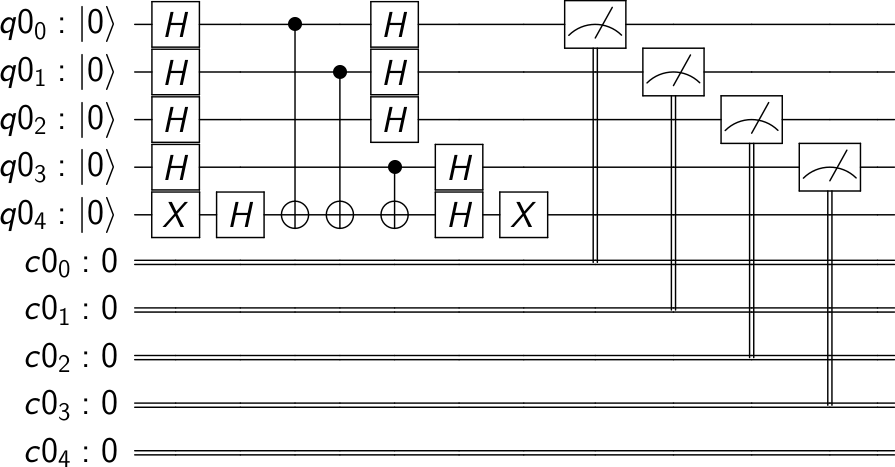

In [10]:
circuit_drawer(BV)

In [8]:
be="local_qasm_simulator"
sc = {
    "noise_params":{
        "readout_error": 0.01,
        "cx": {"p_depol": 0.04}
    }
}
sc["noise_params"]["cx"]["p_depol"]
print(sc["noise_params"])

print(sc["noise_params"]["cx"])
sc["noise_params"]




{'readout_error': 0.01, 'cx': {'p_depol': 0.04}}
{'p_depol': 0.04}


{'cx': {'p_depol': 0.04}, 'readout_error': 0.01}

In [ ]:
if get_backend(be).status["operational"]:
    tarea=execute(BV,backend=be,shots=1024,config=sc)

In [12]:
print(tarea.result().get_counts())

{'00001': 1, '00010': 1, '00011': 13, '01001': 10, '01010': 7, '01011': 983, '01111': 9}


In [13]:
from qiskit.tools.visualization import plot_histogram

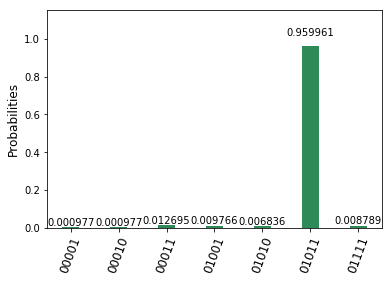

In [14]:
plot_histogram(tarea.result().get_counts())